# Data plots used in Figure 5

In [1]:
# avoid type 3 fonts

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pickle
import os
from glob import glob
from tqdm import tqdm
import yaml
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns
from itertools import product

plt.rcParams["font.size"] = 14

<BarContainer object of 10 artists>

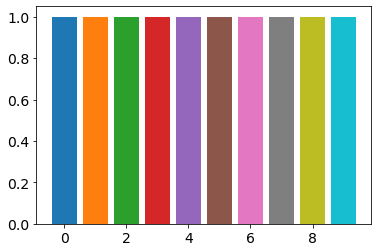

In [3]:
COLORS = list(mcolors.TABLEAU_COLORS.values())
plt.bar(range(len(COLORS)), [1]*len(COLORS), color=COLORS)

In [4]:
def create_csv_file(sampling_strategy, datadir, csv_file):
    header = None
    with open(csv_file, 'w') as f:
        writer = csv.writer(f)
        for dirname in tqdm(glob(os.path.join(datadir, "202*"))):
            eval_file = os.path.join(dirname, "eval.pkl")
            config_file = os.path.join(dirname, ".hydra", "config.yaml")
            with open(config_file, "r") as f:
                config = yaml.safe_load(f)
            with open(eval_file, "rb") as f:
                data = pickle.load(f)

            # read setting
            arr_setting = [config["insdir"].split("/")[-1], sampling_strategy]
            if "num" in config["roadmap"].keys():
                arr_setting += [config["roadmap"]["num"]]
            elif "size" in config["roadmap"].keys():
                arr_setting += [config["roadmap"]["size"]]
            elif "N_traj" in config["roadmap"].keys():
                arr_setting += [config["roadmap"]["N_traj"]]
            elif "sample_rate_vs_diag_speed" in config["roadmap"].keys():
                arr_setting += [config["roadmap"]["sample_rate_vs_diag_speed"]]
            else:
                arr_setting += [0]

            for i, (ins, res, info) in enumerate(data):
                if header is None:
                    header = ["benchmark", "sampling", "roadmap_param", "ins", "num_agents"] 
                    header = header + list(res.get_dict_wo_paths().keys()) + list(info.keys())
                    writer.writerow(header)
                writer.writerow(arr_setting + [i, ins.num_agents] + list(res.get_dict_wo_paths().values()) + list(info.values()))

# create CSV files

In [5]:
DATADIR = "/data/exp/"

In [6]:
sampling_strategy = "random_sampling"
datadir = os.path.join(DATADIR, sampling_strategy)
csv_file = os.path.join(DATADIR, f"{sampling_strategy}.csv")
create_csv_file(sampling_strategy, datadir, csv_file)
df_random_sampling = pd.read_csv(csv_file)
df_random_sampling

100%|██████████| 14/14 [00:21<00:00,  1.53s/it]


,benchmark,sampling,roadmap_param,ins,num_agents,solved,name_planner,elapsed_planner,sum_of_costs,maximum_costs,...,elapsed_static_collide,elapsed_continuous_collide,lowlevel_expanded,lowlevel_explored,sample_nums,elapsed_roadmap_gen,cnt_roadmap_static_collide,cnt_roadmap_continuous_collide,elapsed_roadmap_static_collide,elapsed_roadmap_continuous_collide
0,homo-basis,random_sampling,3000,0,26,True,PrioritizedPlanning,58.755774,846,44,...,0,22.451812,602696,523406,3000,19.831192,3206,15211,0,0.407703
1,homo-basis,random_sampling,3000,1,28,True,PrioritizedPlanning,73.130312,892,47,...,0,28.370795,704942,622756,3000,20.017447,3240,15403,0,0.411536
2,homo-basis,random_sampling,3000,2,21,True,PrioritizedPlanning,22.285944,571,39,...,0,7.861725,303311,252989,3000,18.295612,3262,15429,0,0.413113
3,homo-basis,random_sampling,3000,3,29,False,PrioritizedPlanning,1.257866,0,0,...,0,0.180921,48663,40925,3000,20.606883,3241,15742,0,0.419351
4,homo-basis,random_sampling,3000,4,21,False,PrioritizedPlanning,8.390223,0,0,...,0,2.804405,137950,112824,3000,18.040383,3210,15319,0,0.408239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,homo-more-agents,random_sampling,7000,95,37,True,PrioritizedPlanning,409.518448,843,42,...,0,168.879277,1911291,1654584,7000,94.532569,7533,83903,0,1.844056
1296,homo-more-agents,random_sampling,7000,96,36,True,PrioritizedPlanning,324.760008,833,42,...,0,133.466928,1521200,1297103,7000,97.426294,7510,82860,0,1.823237
1297,homo-more-agents,random_sampling,7000,97,32,True,PrioritizedPlanning,279.873212,675,40,...,0,110.796019,1710071,1469239,7000,91.541952,7469,83525,0,1.838527
1298,homo-more-agents,random_sampling,7000,98,38,True,PrioritizedPlanning,187.864634,794,33,...,0,77.708193,952900,774992,7000,100.380764,7444,83521,0,1.831758


In [7]:
sampling_strategy = "grid_sampling"
datadir = os.path.join(DATADIR, sampling_strategy)
csv_file = os.path.join(DATADIR, f"{sampling_strategy}.csv")
create_csv_file(sampling_strategy, datadir, csv_file)
df_grid_sampling = pd.read_csv(csv_file)
df_grid_sampling

100%|██████████| 14/14 [00:23<00:00,  1.68s/it]


,benchmark,sampling,roadmap_param,ins,num_agents,solved,name_planner,elapsed_planner,sum_of_costs,maximum_costs,...,elapsed_static_collide,elapsed_continuous_collide,lowlevel_expanded,lowlevel_explored,sample_nums,elapsed_roadmap_gen,cnt_roadmap_static_collide,cnt_roadmap_continuous_collide,elapsed_roadmap_static_collide,elapsed_roadmap_continuous_collide
0,homo-basis,grid_sampling,32,0,26,True,PrioritizedPlanning,23.305402,1127,48,...,0,8.942817,267331,235944,962,2.832229,1024,1972,0,0.081210
1,homo-basis,grid_sampling,32,1,28,True,PrioritizedPlanning,28.267115,1057,50,...,0,10.887948,294480,261163,950,2.771001,1024,1950,0,0.079825
2,homo-basis,grid_sampling,32,2,21,True,PrioritizedPlanning,6.957458,645,38,...,0,2.531975,100515,82971,949,2.240400,1024,1917,0,0.078937
3,homo-basis,grid_sampling,32,3,29,True,PrioritizedPlanning,34.967486,1328,52,...,0,13.657680,354258,316880,950,2.892580,1024,1964,0,0.079908
4,homo-basis,grid_sampling,32,4,21,True,PrioritizedPlanning,7.578017,607,39,...,0,2.854453,93102,77592,957,2.085521,1024,1937,0,0.079185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,hetero,grid_sampling,64,95,27,True,PrioritizedPlanning,79.704893,481,35,...,0,30.416423,647007,540901,6505792,512.425122,110592,910441,0,21.310648
1396,hetero,grid_sampling,64,96,26,True,PrioritizedPlanning,64.123106,536,36,...,0,25.507639,431605,342531,6296512,494.366654,106496,922277,0,21.066906
1397,hetero,grid_sampling,64,97,22,True,PrioritizedPlanning,64.340555,441,33,...,0,24.582045,531356,436777,5344768,425.273825,90112,802676,0,18.471728
1398,hetero,grid_sampling,64,98,28,True,PrioritizedPlanning,203.112797,590,43,...,0,79.405225,1435318,1282249,6822848,540.988238,114688,1032533,0,23.767990


In [8]:
sampling_strategy = "rect_sampling"
datadir = os.path.join(DATADIR, sampling_strategy)
csv_file = os.path.join(DATADIR, f"{sampling_strategy}.csv")
create_csv_file(sampling_strategy, datadir, csv_file)
df_rect_sampling = pd.read_csv(csv_file)
df_rect_sampling

100%|██████████| 15/15 [00:20<00:00,  1.36s/it]


,benchmark,sampling,roadmap_param,ins,num_agents,solved,name_planner,elapsed_planner,sum_of_costs,maximum_costs,...,elapsed_static_collide,elapsed_continuous_collide,lowlevel_expanded,lowlevel_explored,sample_nums,elapsed_roadmap_gen,cnt_roadmap_static_collide,cnt_roadmap_continuous_collide,elapsed_roadmap_static_collide,elapsed_roadmap_continuous_collide
0,homo-basis,rect_sampling,50,0,26,True,PrioritizedPlanning,43.668015,725,50,...,0,16.995550,387990,357328,21213,37.963808,24406,98854,0,2.900185
1,homo-basis,rect_sampling,50,1,28,False,PrioritizedPlanning,8.235322,0,0,...,0,2.412945,156632,145348,20039,34.347856,23233,95531,0,2.827323
2,homo-basis,rect_sampling,50,2,21,True,PrioritizedPlanning,13.065591,546,39,...,0,4.682103,160684,138499,15208,24.945412,17979,71802,0,2.116731
3,homo-basis,rect_sampling,50,3,29,False,PrioritizedPlanning,0.532971,0,0,...,0,0.068559,19939,16976,22904,42.245891,25655,105957,0,3.136853
4,homo-basis,rect_sampling,50,4,21,False,PrioritizedPlanning,1.280828,0,0,...,0,0.288555,34486,29472,13329,20.444285,15660,67661,0,1.942133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,hetero,rect_sampling,100,95,27,True,PrioritizedPlanning,41.876925,493,33,...,0,16.388402,313253,271689,28606,71.251734,34659,298545,0,6.754231
1496,hetero,rect_sampling,100,96,26,True,PrioritizedPlanning,39.646737,542,34,...,0,16.122882,254487,206573,34130,91.409419,39581,345845,0,7.930187
1497,hetero,rect_sampling,100,97,22,True,PrioritizedPlanning,23.945757,403,29,...,0,9.321156,186628,148405,27509,75.427033,30770,279586,0,6.344088
1498,hetero,rect_sampling,100,98,28,False,PrioritizedPlanning,21.523254,0,0,...,0,6.987494,291214,260634,36054,98.747339,43421,362122,0,8.231245


In [9]:
sampling_strategy = "spars_sampling"
datadir = os.path.join(DATADIR, sampling_strategy)
csv_file = os.path.join(DATADIR, f"{sampling_strategy}.csv")
create_csv_file(sampling_strategy, datadir, csv_file)
df_spars_sampling = pd.read_csv(csv_file)
df_spars_sampling

100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


,benchmark,sampling,roadmap_param,ins,num_agents,solved,name_planner,elapsed_planner,sum_of_costs,maximum_costs,...,elapsed_static_collide,elapsed_continuous_collide,lowlevel_expanded,lowlevel_explored,sample_nums,elapsed_roadmap_gen,cnt_roadmap_static_collide,cnt_roadmap_continuous_collide,elapsed_roadmap_static_collide,elapsed_roadmap_continuous_collide
0,homo-basis,spars_sampling,0,0,26,True,PrioritizedPlanning,258.403057,1328,78,...,0,95.182183,3181156,3003032,7112,84.509962,33910,2098548,0.0,0.022877
1,homo-basis,spars_sampling,0,1,28,False,PrioritizedPlanning,52.633721,0,0,...,0,15.571920,1115799,1054032,7112,87.301513,68404,4194046,0.0,0.025826
2,homo-basis,spars_sampling,0,2,21,True,PrioritizedPlanning,111.545039,943,69,...,0,38.787747,1667713,1556825,7185,79.553988,102317,6326948,0.0,0.019895
3,homo-basis,spars_sampling,0,3,29,True,PrioritizedPlanning,300.724967,1419,85,...,0,114.273020,3324880,3139267,7163,85.688283,136581,8427356,0.0,0.026815
4,homo-basis,spars_sampling,0,4,21,True,PrioritizedPlanning,114.863711,852,73,...,0,42.251143,1471350,1373577,7110,80.546156,170016,10502848,0.0,0.019212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,hetero,spars_sampling,0,95,27,False,PrioritizedPlanning,117.858122,0,0,...,0,41.228348,2137608,2048837,11237400,836.173258,35049996,1499541093,10828.0,10828.030735
496,hetero,spars_sampling,0,96,26,False,PrioritizedPlanning,121.947528,0,0,...,0,46.541366,1800984,1712492,10798740,804.270413,31211313,1414280893,5400.0,5400.031678
497,hetero,spars_sampling,0,97,22,False,PrioritizedPlanning,50.491554,0,0,...,0,16.443826,1023272,964481,8859960,679.491601,28476011,1278081953,8907.0,8907.025524
498,hetero,spars_sampling,0,98,28,False,PrioritizedPlanning,12.158332,0,0,...,0,2.537783,467905,452294,11439630,864.630558,36011341,1605635953,7933.0,7933.031227


In [10]:
sampling_strategy = "ctrm_sampling"
datadir = os.path.join(DATADIR, sampling_strategy)
csv_file = os.path.join(DATADIR, f"{sampling_strategy}.csv")
create_csv_file(sampling_strategy, datadir, csv_file)
df_ctrm_sampling = pd.read_csv(csv_file)
df_ctrm_sampling

100%|██████████| 20/20 [00:31<00:00,  1.56s/it]


,benchmark,sampling,roadmap_param,ins,num_agents,solved,name_planner,elapsed_planner,sum_of_costs,maximum_costs,...,elapsed_static_collide,elapsed_continuous_collide,lowlevel_expanded,lowlevel_explored,sample_nums,elapsed_roadmap_gen,cnt_roadmap_static_collide,cnt_roadmap_continuous_collide,elapsed_roadmap_static_collide,elapsed_roadmap_continuous_collide
0,homo-basis,ctrm_sampling,25,0,26,False,PrioritizedPlanning,1.246495,0,0,...,0,0.452370,15321,14467,32953,16.320039,0,212693,0,4.187567
1,homo-basis,ctrm_sampling,25,1,28,True,PrioritizedPlanning,1.805620,686,47,...,0,0.744668,21122,20156,40182,18.604357,0,275184,0,5.354584
2,homo-basis,ctrm_sampling,25,2,21,True,PrioritizedPlanning,0.815402,477,46,...,0,0.323081,12007,11170,24669,11.233718,0,155697,0,2.985339
3,homo-basis,ctrm_sampling,25,3,29,True,PrioritizedPlanning,2.229951,783,52,...,0,0.918550,24693,23714,38894,17.057586,0,248953,0,4.840054
4,homo-basis,ctrm_sampling,25,4,21,True,PrioritizedPlanning,1.015785,395,44,...,0,0.393325,14060,13206,22454,10.588290,0,160560,0,3.034045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,homo-more-agents,ctrm_sampling,100,95,37,True,PrioritizedPlanning,19.132866,852,46,...,0,7.942912,116642,110545,212648,177.528307,0,3818582,0,78.243119
1996,homo-more-agents,ctrm_sampling,100,96,36,True,PrioritizedPlanning,16.643914,807,48,...,0,6.958376,101539,94929,207517,175.997669,0,3744156,0,77.586029
1997,homo-more-agents,ctrm_sampling,100,97,32,True,PrioritizedPlanning,12.512087,737,43,...,0,5.068346,92351,86274,164777,148.057039,0,2999152,0,65.308382
1998,homo-more-agents,ctrm_sampling,100,98,38,False,PrioritizedPlanning,9.251762,0,0,...,0,3.637676,73974,67621,177562,158.498697,0,3282130,0,70.879688


In [11]:
df = pd.concat([
    df_random_sampling, 
    df_grid_sampling,
    df_rect_sampling,
    df_spars_sampling,
    df_ctrm_sampling,
])
df

,benchmark,sampling,roadmap_param,ins,num_agents,solved,name_planner,elapsed_planner,sum_of_costs,maximum_costs,...,elapsed_static_collide,elapsed_continuous_collide,lowlevel_expanded,lowlevel_explored,sample_nums,elapsed_roadmap_gen,cnt_roadmap_static_collide,cnt_roadmap_continuous_collide,elapsed_roadmap_static_collide,elapsed_roadmap_continuous_collide
0,homo-basis,random_sampling,3000,0,26,True,PrioritizedPlanning,58.755774,846,44,...,0,22.451812,602696,523406,3000,19.831192,3206,15211,0.0,0.407703
1,homo-basis,random_sampling,3000,1,28,True,PrioritizedPlanning,73.130312,892,47,...,0,28.370795,704942,622756,3000,20.017447,3240,15403,0.0,0.411536
2,homo-basis,random_sampling,3000,2,21,True,PrioritizedPlanning,22.285944,571,39,...,0,7.861725,303311,252989,3000,18.295612,3262,15429,0.0,0.413113
3,homo-basis,random_sampling,3000,3,29,False,PrioritizedPlanning,1.257866,0,0,...,0,0.180921,48663,40925,3000,20.606883,3241,15742,0.0,0.419351
4,homo-basis,random_sampling,3000,4,21,False,PrioritizedPlanning,8.390223,0,0,...,0,2.804405,137950,112824,3000,18.040383,3210,15319,0.0,0.408239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,homo-more-agents,ctrm_sampling,100,95,37,True,PrioritizedPlanning,19.132866,852,46,...,0,7.942912,116642,110545,212648,177.528307,0,3818582,0.0,78.243119
1996,homo-more-agents,ctrm_sampling,100,96,36,True,PrioritizedPlanning,16.643914,807,48,...,0,6.958376,101539,94929,207517,175.997669,0,3744156,0.0,77.586029
1997,homo-more-agents,ctrm_sampling,100,97,32,True,PrioritizedPlanning,12.512087,737,43,...,0,5.068346,92351,86274,164777,148.057039,0,2999152,0.0,65.308382
1998,homo-more-agents,ctrm_sampling,100,98,38,False,PrioritizedPlanning,9.251762,0,0,...,0,3.637676,73974,67621,177562,158.498697,0,3282130,0.0,70.879688


In [12]:
print(list(df.keys()))

['benchmark', 'sampling', 'roadmap_param', 'ins', 'num_agents', 'solved', 'name_planner', 'elapsed_planner', 'sum_of_costs', 'maximum_costs', 'sum_of_travel_dists', 'maximum_travel_dists', 'cnt_static_collide', 'cnt_continuous_collide', 'elapsed_static_collide', 'elapsed_continuous_collide', 'lowlevel_expanded', 'lowlevel_explored', 'sample_nums', 'elapsed_roadmap_gen', 'cnt_roadmap_static_collide', 'cnt_roadmap_continuous_collide', 'elapsed_roadmap_static_collide', 'elapsed_roadmap_continuous_collide']


# get tables

## success rate

In [13]:
df_success_rate = pd.DataFrame([], columns=[
    "benchmark", 
    "sampling", 
    "roadmap_param", 
    "success_rate",
    "elapsed_roadmap_gen",
    "cnt_roadmap_collide"
])

arr_benchmark = list(df["benchmark"].unique())
arr_sampling = list(df["sampling"].unique())

for benchmark, sampling in product(arr_benchmark, arr_sampling):
    arr_roadmap_param = list(df.query(f"benchmark == '{benchmark}' and sampling == '{sampling}'")["roadmap_param"].unique())
    for roadmap_param in arr_roadmap_param:
        df_sub = df.query(f"benchmark == '{benchmark}' and sampling == '{sampling}' and roadmap_param == {roadmap_param}")
        success_rate = len(df_sub.query(f"solved == True")) / len(df_sub)
        row = pd.DataFrame([
            benchmark, 
            sampling, 
            roadmap_param, 
            success_rate,
            df_sub["elapsed_roadmap_gen"].mean(),
            (df_sub["cnt_roadmap_static_collide"] + df_sub["cnt_roadmap_continuous_collide"]).mean(),
        ], index=df_success_rate.columns).T
        df_success_rate = df_success_rate.append(row)


for _, res in df_success_rate.groupby("benchmark"):
    display(res)
    print()

,benchmark,sampling,roadmap_param,success_rate,elapsed_roadmap_gen,cnt_roadmap_collide
0,hetero,random_sampling,3000,0.85,306.235842,694079.55
0,hetero,grid_sampling,32,0.82,32.947708,84264.3
0,hetero,grid_sampling,64,0.95,478.346028,987311.23
0,hetero,rect_sampling,75,0.8,42.045392,189728.66
0,hetero,rect_sampling,50,0.5,19.312838,89988.43
0,hetero,rect_sampling,100,0.88,72.002256,325866.94
0,hetero,spars_sampling,0,0.09,770.931706,760656815.57
0,hetero,ctrm_sampling,25,0.32,14.49509,215580.33
0,hetero,ctrm_sampling,50,0.75,37.463395,704935.3
0,hetero,ctrm_sampling,75,0.82,67.870446,1459232.06


,benchmark,sampling,roadmap_param,success_rate,elapsed_roadmap_gen,cnt_roadmap_collide
0,homo-basis,random_sampling,3000,0.84,20.637169,18748.87
0,homo-basis,random_sampling,5000,1.0,47.162557,48116.51
0,homo-basis,random_sampling,7000,1.0,84.720704,90737.44
0,homo-basis,grid_sampling,32,0.86,3.322752,2975.54
0,homo-basis,grid_sampling,64,0.96,13.298021,26557.18
0,homo-basis,grid_sampling,84,1.0,23.978955,70912.76
0,homo-basis,rect_sampling,50,0.44,29.854154,105751.37
0,homo-basis,rect_sampling,75,0.86,65.785259,222426.9
0,homo-basis,rect_sampling,100,0.94,107.579528,381726.96
0,homo-basis,spars_sampling,0,0.89,87.099712,109008610.02


,benchmark,sampling,roadmap_param,success_rate,elapsed_roadmap_gen,cnt_roadmap_collide
0,homo-many-obs,random_sampling,3000,0.83,21.731945,19849.56
0,homo-many-obs,random_sampling,5000,0.89,48.741981,50729.64
0,homo-many-obs,random_sampling,7000,0.94,86.703923,95758.55
0,homo-many-obs,grid_sampling,32,0.81,3.240946,2802.02
0,homo-many-obs,grid_sampling,64,0.95,13.520467,24624.96
0,homo-many-obs,grid_sampling,84,0.98,24.575464,65453.56
0,homo-many-obs,rect_sampling,50,0.18,25.779258,97937.45
0,homo-many-obs,rect_sampling,75,0.67,56.138745,205151.43
0,homo-many-obs,rect_sampling,100,0.82,97.034075,351301.65
0,homo-many-obs,spars_sampling,0,0.6,86.544499,87544056.21


,benchmark,sampling,roadmap_param,success_rate,elapsed_roadmap_gen,cnt_roadmap_collide
0,homo-more-agents,random_sampling,3000,0.76,25.549502,18972.49
0,homo-more-agents,random_sampling,5000,0.93,55.114457,48422.13
0,homo-more-agents,random_sampling,7000,0.93,94.596446,91280.02
0,homo-more-agents,grid_sampling,32,0.71,4.830235,3037.22
0,homo-more-agents,grid_sampling,64,0.97,20.150168,26809.28
0,homo-more-agents,grid_sampling,84,0.99,35.525085,71348.09
0,homo-more-agents,rect_sampling,50,0.39,38.734906,147541.94
0,homo-more-agents,rect_sampling,75,0.8,84.917563,310573.18
0,homo-more-agents,rect_sampling,100,0.88,145.246748,533030.34
0,homo-more-agents,spars_sampling,0,0.56,100.663429,104760667.3


,benchmark,sampling,roadmap_param,success_rate,elapsed_roadmap_gen,cnt_roadmap_collide
0,homo-wo-obs,random_sampling,3000,0.85,20.347862,17772.13
0,homo-wo-obs,random_sampling,5000,0.96,46.264131,45509.89
0,homo-wo-obs,random_sampling,7000,1.0,82.410698,86018.54
0,homo-wo-obs,grid_sampling,32,0.9,3.550548,3164.59
0,homo-wo-obs,grid_sampling,64,0.96,13.586301,28671.38
0,homo-wo-obs,grid_sampling,84,1.0,24.289983,76881.39
0,homo-wo-obs,rect_sampling,50,0.78,30.865288,114297.57
0,homo-wo-obs,rect_sampling,75,0.95,67.841987,241778.05
0,homo-wo-obs,rect_sampling,100,0.94,118.181355,415894.52
0,homo-wo-obs,spars_sampling,0,0.94,89.907166,135721815.24


## solution quality and planning effort

In [14]:
arr_benchmark = list(df["benchmark"].unique())

for benchmark in arr_benchmark:
    num_strategies = len(df.query(f"benchmark == '{benchmark}'").groupby(["sampling", "roadmap_param"]))
    df_sub = df.query(f"benchmark == '{benchmark}' and solved == 1")
    all_success_indexes = tuple(df_sub.groupby("ins")["benchmark"].count().loc[lambda x: x >= num_strategies].index)
    df_all_success = df_sub.query(f"ins in {all_success_indexes}")
    print(f"benchmark={benchmark}, instances succeeded over all strategies: {len(all_success_indexes)} / 100\n")
    res = df_all_success.groupby(["sampling", "roadmap_param"])[[
       "sum_of_costs", "lowlevel_expanded", "elapsed_planner"
    ]].mean()
    display(res)
    print()

benchmark=homo-basis, instances succeeded over all strategies: 22 / 100



sum_of_costs  lowlevel_expanded  \
sampling        roadmap_param                                    
ctrm_sampling   25               544.909091       1.604832e+04   
                50               537.590909       3.313209e+04   
                75               534.454545       4.827450e+04   
                100              525.454545       6.320541e+04   
grid_sampling   32               796.954545       1.509922e+05   
                64               554.818182       6.490283e+05   
                84               528.681818       8.682735e+05   
random_sampling 3000             700.727273       4.492288e+05   
                5000             572.772727       6.015697e+05   
                7000             520.318182       7.809959e+05   
rect_sampling   50               590.636364       2.687816e+05   
                75               538.318182       3.274642e+05   
                100              510.454545       4.016215e+05   
spars_sampling  0               1021.681818       2.000613e+06   

                               elapsed_planner  
sampling        roadmap_param                   
ctrm_sampling   25                    1.269019  
                50                    2.843486  
                75                    4.499633  
                100                   6.639297  
grid_sampling   32                   12.768416  
                64                   64.884470  
                84                   98.046770  
random_sampling 3000                 42.301543  
                5000                 65.379388  
                7000                 96.677111  
rect_sampling   50                   27.233282  
                75                   37.088020  
                100                  47.327576  
spars_sampling  0                   159.109917


benchmark=homo-wo-obs, instances succeeded over all strategies: 48 / 100



sum_of_costs  lowlevel_expanded  \
sampling        roadmap_param                                    
ctrm_sampling   25               525.041667       1.608550e+04   
                50               521.270833       3.173883e+04   
                75               517.500000       4.668781e+04   
                100              512.416667       6.174892e+04   
grid_sampling   32               790.250000       1.671130e+05   
                64               540.041667       6.968487e+05   
                84               523.916667       9.427021e+05   
random_sampling 3000             690.166667       4.388690e+05   
                5000             572.750000       6.212869e+05   
                7000             518.625000       8.003595e+05   
rect_sampling   50               571.187500       2.784997e+05   
                75               523.729167       3.434216e+05   
                100              498.625000       4.208344e+05   
spars_sampling  0                959.979167       2.075351e+06   

                               elapsed_planner  
sampling        roadmap_param                   
ctrm_sampling   25                    1.360011  
                50                    2.725121  
                75                    4.352354  
                100                   6.109493  
grid_sampling   32                   14.389737  
                64                   68.226862  
                84                  102.558542  
random_sampling 3000                 41.029139  
                5000                 66.558916  
                7000                 95.695826  
rect_sampling   50                   26.732552  
                75                   37.065418  
                100                  50.289868  
spars_sampling  0                   164.143631


benchmark=hetero, instances succeeded over all strategies: 1 / 100



sum_of_costs  lowlevel_expanded  \
sampling        roadmap_param                                    
ctrm_sampling   25                    414.0            11775.0   
                50                    401.0            22090.0   
                75                    396.0            34141.0   
                100                   388.0            42545.0   
grid_sampling   32                    355.0            74152.0   
                64                    324.0           356831.0   
random_sampling 3000                  332.0           226792.0   
rect_sampling   50                    351.0            82568.0   
                75                    336.0           117519.0   
                100                   307.0           133975.0   
spars_sampling  0                     813.0          1422030.0   

                               elapsed_planner  
sampling        roadmap_param                   
ctrm_sampling   25                    0.881603  
                50                    1.909246  
                75                    3.444598  
                100                   4.639122  
grid_sampling   32                    5.840560  
                64                   41.977373  
random_sampling 3000                 24.805443  
rect_sampling   50                    8.034976  
                75                   13.994635  
                100                  17.955769  
spars_sampling  0                   108.443743


benchmark=homo-many-obs, instances succeeded over all strategies: 10 / 100



sum_of_costs  lowlevel_expanded  \
sampling        roadmap_param                                    
ctrm_sampling   25                    603.5            18609.6   
                50                    581.4            35483.1   
                75                    566.6            50557.3   
                100                   561.3            64713.2   
grid_sampling   32                    821.7           134672.1   
                64                    564.1           585922.6   
                84                    532.4           770005.9   
random_sampling 3000                  709.8           407258.9   
                5000                  562.9           578174.4   
                7000                  520.1           774781.5   
rect_sampling   50                    611.6           258438.2   
                75                    542.6           309589.7   
                100                   522.1           380846.7   
spars_sampling  0                    1099.1          1758766.9   

                               elapsed_planner  
sampling        roadmap_param                   
ctrm_sampling   25                    1.595623  
                50                    3.210424  
                75                    4.996322  
                100                   6.844078  
grid_sampling   32                   11.504020  
                64                   57.370964  
                84                   88.698084  
random_sampling 3000                 40.558639  
                5000                 69.548992  
                7000                101.935654  
rect_sampling   50                   25.658523  
                75                   35.116918  
                100                  47.992910  
spars_sampling  0                   141.842473


benchmark=homo-more-agents, instances succeeded over all strategies: 8 / 100



sum_of_costs  lowlevel_expanded  \
sampling        roadmap_param                                    
ctrm_sampling   25                  819.875          26048.875   
                50                  804.875          53446.000   
                75                  797.750          78473.625   
                100                 793.750         107056.750   
grid_sampling   32                 1201.000         250719.125   
                64                  798.125        1077572.000   
                84                  755.875        1443512.500   
random_sampling 3000                998.500         723653.000   
                5000                833.375        1036006.625   
                7000                739.125        1339451.375   
rect_sampling   50                  851.375         435948.625   
                75                  774.875         523850.000   
                100                 729.125         666138.500   
spars_sampling  0                  1583.375        3357928.125   

                               elapsed_planner  
sampling        roadmap_param                   
ctrm_sampling   25                    2.786792  
                50                    6.253600  
                75                    9.993589  
                100                  14.642091  
grid_sampling   32                   30.034159  
                64                  151.267378  
                84                  232.501501  
random_sampling 3000                 95.766242  
                5000                166.899501  
                7000                238.912031  
rect_sampling   50                   61.258595  
                75                   82.087490  
                100                 118.432842  
spars_sampling  0                   355.407430

# utilities

In [15]:
def get_viz_params(sampling_strategy, roadmap_param):
    if  "ctrm" in sampling_strategy:
        color = COLORS[0]
    elif "random" in sampling_strategy:
        color = COLORS[1]
    elif "grid" in sampling_strategy:
        color = COLORS[2]
    elif "rect" in sampling_strategy:
        color = COLORS[3]
    elif "spars" in sampling_strategy:
        color = COLORS[4]
    else:
        color = COLORS[-1]
    return {
        "color": color,
    }

In [16]:
def get_label(sampling_strategy):
    if  "ctrm" in sampling_strategy:
        return "CTRMs"
    elif "random" in sampling_strategy:
        return "random"
    elif "grid" in sampling_strategy:
        return "grid"
    elif "rect" in sampling_strategy:
        return "square"
    elif "spars" in sampling_strategy:
        return "SPARS"
    return ""

In [17]:
def get_title(benchmark):
    if benchmark == "homo-basis":
        return "21-30 agents, homo, obs x 10"
    if benchmark == "homo-wo-obs":
        return "21-30 agents, homo, obs x 0"
    if benchmark == "hetero":
        return "21-30 agents, hetero, obs x 10"
    if benchmark == "homo-more-agents":
        return "31-40 agents, homo, obs x 10"
    if benchmark == "homo-many-obs":
        return "21-30 agents, homo, obs x 20"
    return benchmark

In [18]:
def sort_sampling_strategy(arr_strategy):
    def fn(x):
        if x == "ctrm_sampling":
            return 0
        if x == "random_sampling":
            return 1
        if x == "grid_sampling":
            return 2
        if x == "spars_sampling":
            return 3
        if x == "rect_sampling":
            return 4
        return -1
    return sorted(arr_strategy, key=fn)

In [19]:
def savefig(filename):
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.05)

In [20]:
# sorting
arr_sampling = [ "ctrm_sampling", "random_sampling", "grid_sampling", "spars_sampling", "rect_sampling" ]

# success rate v.s. sample_nums_per_agent_per_timestep

In [21]:
def plot_success_rate_vs_sample_nums_per_agent_per_timestep(df, benchmark):
    fig = plt.figure(figsize=(6, 4))
    ax = plt.gca()

    df_sub = df.query(f"benchmark == '{benchmark}'")

    for sampling_strategy in sort_sampling_strategy(df["sampling"].unique()):
        df_subgroup = df_sub.query(f"sampling == '{sampling_strategy}'")
        arr_x = []
        arr_y = []
        for (roadmap_param, res) in df_subgroup.groupby(["roadmap_param"]):
            if "ctrm" in sampling_strategy:
                estimated_timestep = res.query("solved == 1")["maximum_costs"].min()
                x = ((res["sample_nums"] / res["num_agents"])).mean() / estimated_timestep
            elif "rect" in sampling_strategy:
                x = ((res["sample_nums"] / res["num_agents"])).mean()
            elif "hetero" in benchmark:
                x = ((res["sample_nums"] / res["num_agents"])).mean() / 64
            else:
                x = (res["sample_nums"]).mean()
            y = res.query("solved == 1")["solved"].count() / 100
            arr_x.append(x)
            arr_y.append(y)
        linewidth = 4 if "ctrm" in sampling_strategy else 2
        markersize= 10 if "ctrm" in sampling_strategy else 8
        markeredgewidth = 2 if "ctrm" in sampling_strategy else 1.5
        plt.plot(arr_x, arr_y, marker="x", linewidth=linewidth, markersize=markersize, markeredgewidth=markeredgewidth, 
                 **get_viz_params(sampling_strategy, roadmap_param),
                 label=get_label(sampling_strategy),
                )

    # plt.title(get_title(benchmark), fontsize=16)
    plt.ylim(0, 1.01)
    plt.xlim(-40, 8200)
    plt.xticks([0, 3000, 6000])
    plt.xlabel("samples per (agent, timestep)", fontsize=20)
    plt.ylabel("success rate", fontsize=20)
    plt.legend(frameon=False, fontsize=14, ncol=2, loc="lower center")

In [22]:
arr_benchmark

['homo-basis', 'homo-wo-obs', 'hetero', 'homo-many-obs', 'homo-more-agents']

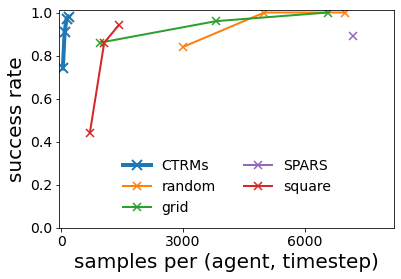

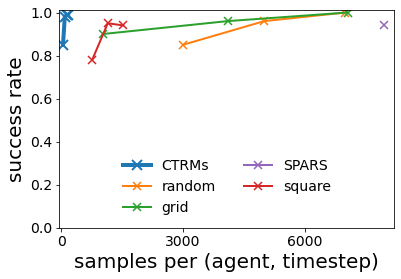

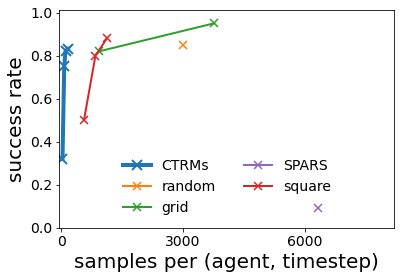

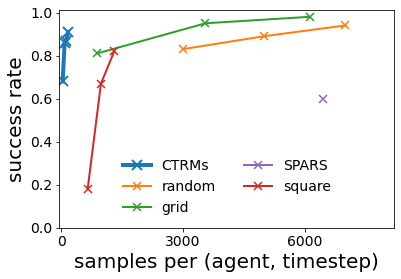

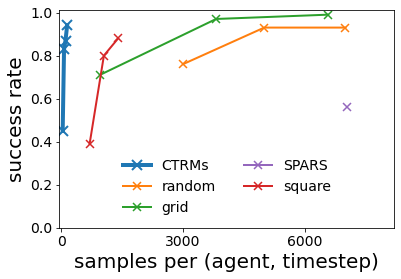

In [23]:
for benchmark in arr_benchmark:
    plot_success_rate_vs_sample_nums_per_agent_per_timestep(df, benchmark)
    savefig(f"fig/success_rate_vs_sample_nums_per_agent_per_timestep_{benchmark}.pdf")

# solution quality v.s. planning effort

In [24]:
def plot_solution_quality_vs_effort(df, benchmark, border_success_ins, x_axis, x_label):
    df_bench = df.query(f"benchmark == '{benchmark}'")
    df_solved = df_bench.query(f"solved == 1")
    df_sub = df_solved

    for (sampling, roadmap_param), res in df_solved.groupby(["sampling", "roadmap_param"]):
        if len(res) < border_success_ins:
            df_sub = df_sub.query(f"sampling != '{sampling}' or roadmap_param != {roadmap_param}")

    num_strategies = len(df_sub.groupby(["sampling", "roadmap_param"]))
    all_success_indexes = tuple(df_sub.groupby("ins")["benchmark"].count().loc[lambda x: x >= num_strategies].index)
    df_all_success = df_sub.query(f"ins in {all_success_indexes}")
    
    arr_sampling_strategy = list(df_all_success["sampling"].unique())
    arr_x_mean = {}
    arr_y_mean = {}
    for sampling_strategy in arr_sampling_strategy:
        arr_x_mean[sampling_strategy] = []
        arr_y_mean[sampling_strategy] = []

    fig = plt.figure(figsize=(6, 4))
    ax = plt.gca()

    for i, ((sampling_strategy, roadmap_param), res) in enumerate(df_all_success.groupby(["sampling", "roadmap_param"])):
        x = res[x_axis] / res["num_agents"]
        y = res["sum_of_costs"] / res["num_agents"]
        arr_x_mean[sampling_strategy].append(x.mean())
        arr_y_mean[sampling_strategy].append(y.mean())
        sns.kdeplot(x=x, y=y, alpha=0.25, shade=False, levels=3, thresh=0.3, **get_viz_params(sampling_strategy, roadmap_param))

    for sampling_strategy in sort_sampling_strategy(arr_sampling_strategy):
        x = arr_x_mean[sampling_strategy]
        y = arr_y_mean[sampling_strategy]
        plt.plot(x, y, marker=".", linewidth=2, markersize=15, markeredgewidth=2, alpha=0.8,
                 **get_viz_params(sampling_strategy, roadmap_param),
                )
        
    # plot label
    for sampling_strategy in sort_sampling_strategy(df["sampling"].unique()):
        plt.plot([10000], [-100], marker=".", linewidth=2, markersize=15, markeredgewidth=2, alpha=0.8,
                 **get_viz_params(sampling_strategy, roadmap_param),
                 label=get_label(sampling_strategy))
    

    plt.ylim(0, 48)
    plt.xscale("log")
    plt.xlim(500, 150000)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel("sum-of-costs / agents", fontsize=20)
    # plt.title(get_title(benchmark), fontsize=24)
    plt.legend(frameon=False, fontsize=14, ncol=2, loc="upper left")
    plt.text(x=0.5, y=0.05,  s=f"average over {len(all_success_indexes)}/100 instances", 
             horizontalalignment='center',
             verticalalignment='center', 
             transform=ax.transAxes, fontsize=16)
    
def plot_solution_quality_vs_expanded_node(df, benchmark, border_success_ins=0):
    plot_solution_quality_vs_effort(df, benchmark, border_success_ins, "lowlevel_expanded", "expanded nodes / agents")

def plot_solution_quality_vs_planner_runtime(df, benchmark, border_success_ins=0):
    plot_solution_quality_vs_effort(df, benchmark, border_success_ins, "elapsed_planner", "runtime of planner (sec) per agent")

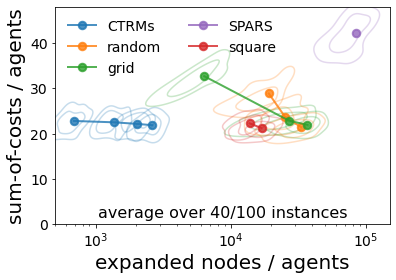

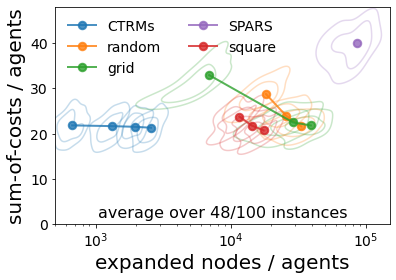

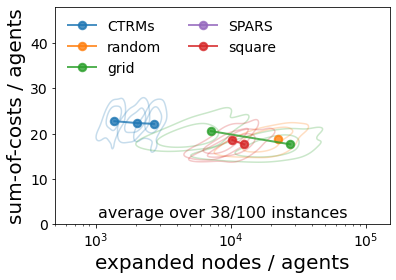

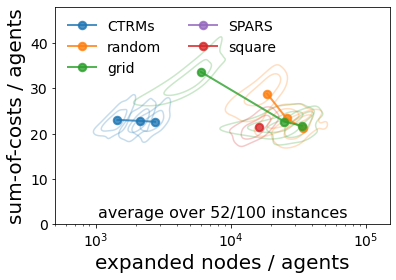

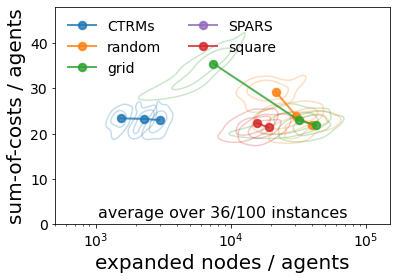

In [25]:
for benchmark in arr_benchmark:
    plot_solution_quality_vs_expanded_node(df, benchmark, border_success_ins=70)
    savefig(f"fig/cost_vs_expanded-nodes_{benchmark}.pdf")

In [26]:
def plot_runtime_stack_details(df, benchmark, border_success_ins=0):
    df_bench = df.query(f"benchmark == '{benchmark}'")
    df_solved = df_bench.query(f"solved == 1")
    df_sub = df_solved

    for (sampling, roadmap_param), res in df_solved.groupby(["sampling", "roadmap_param"]):
        if len(res) < border_success_ins:
            df_sub = df_sub.query(f"sampling != '{sampling}' or roadmap_param != {roadmap_param}")

    num_strategies = len(df_sub.groupby(["sampling", "roadmap_param"]))
    all_success_indexes = tuple(df_sub.groupby("ins")["benchmark"].count().loc[lambda x: x >= num_strategies].index)
    df_all_success = df_sub.query(f"ins in {all_success_indexes}")


    fig = plt.figure(figsize=(6, 4))
    ax = plt.gca()

    i = 0
    xticks = [[], []]
    for sampling_strategy in sort_sampling_strategy(df["sampling"].unique()):
        df_subgroup = df.query(f"sampling == '{sampling_strategy}'")
        xticks[0].append(i + len(df_subgroup["roadmap_param"].unique()) / 2 - 0.5)
        xticks[1].append(get_label(sampling_strategy))

        for roadmap_param in sorted(df_subgroup["roadmap_param"].unique()):
            print(f"sampling == '{sampling_strategy}' and roadmap_param == {roadmap_param}")
            res = df_all_success.query(f"sampling == '{sampling_strategy}' and roadmap_param == {roadmap_param}")
            y1 = (res["elapsed_planner"]).mean()
            y2 = (res["elapsed_roadmap_gen"] + y1).mean()

            plt.bar([i], [y2], color=COLORS[-3])
            plt.bar([i], [y1], color=COLORS[-1])

            if pd.isna(y2):
                plt.text(x=i, y=5, s="x", horizontalalignment="center", fontsize=16)

            i+= 1
        i += 1

    # for label
    plt.bar([i-2], [0], color=COLORS[-3], label="roadmap")
    plt.bar([i-2], [0], color=COLORS[-1], label="planner")

    # plt.title(get_title(benchmark), fontsize=16)
    plt.xlim(-1, i-1)
    plt.xticks(*xticks, fontsize=20, rotation=45)
    plt.ylabel("runtime (sec)", fontsize=20)
    plt.ylim(0, 590)
    plt.legend(frameon=False, fontsize=16, loc="upper left", bbox_to_anchor=(0, 0.9))
    plt.text(x=0.5, y=0.95,  s=f"average over {len(all_success_indexes)}/100 instances", 
                 horizontalalignment='center',
                 verticalalignment='center', 
                 transform=ax.transAxes, fontsize=16)

sampling == 'ctrm_sampling' and roadmap_param == 25
sampling == 'ctrm_sampling' and roadmap_param == 50
sampling == 'ctrm_sampling' and roadmap_param == 75
sampling == 'ctrm_sampling' and roadmap_param == 100
sampling == 'random_sampling' and roadmap_param == 3000
sampling == 'random_sampling' and roadmap_param == 5000
sampling == 'random_sampling' and roadmap_param == 7000
sampling == 'grid_sampling' and roadmap_param == 32
sampling == 'grid_sampling' and roadmap_param == 64
sampling == 'grid_sampling' and roadmap_param == 84
sampling == 'spars_sampling' and roadmap_param == 0
sampling == 'rect_sampling' and roadmap_param == 50
sampling == 'rect_sampling' and roadmap_param == 75
sampling == 'rect_sampling' and roadmap_param == 100
sampling == 'ctrm_sampling' and roadmap_param == 25
sampling == 'ctrm_sampling' and roadmap_param == 50
sampling == 'ctrm_sampling' and roadmap_param == 75
sampling == 'ctrm_sampling' and roadmap_param == 100
sampling == 'random_sampling' and roadmap_param =

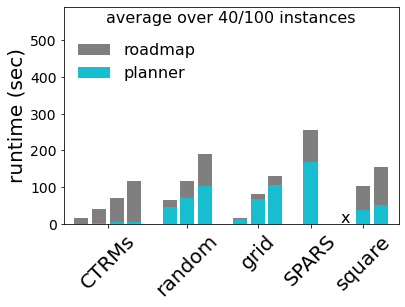

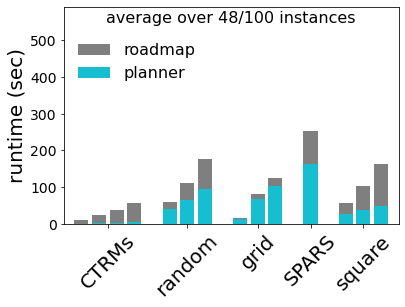

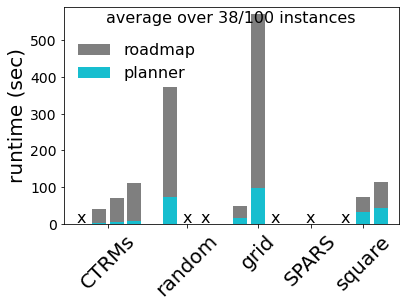

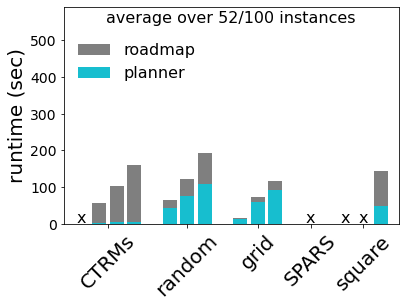

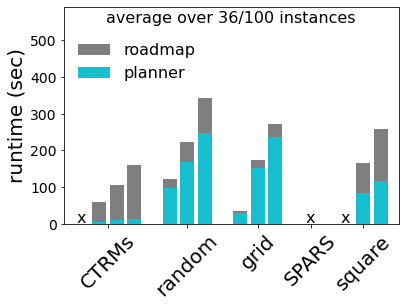

In [27]:
for benchmark in arr_benchmark:
    plot_runtime_stack_details(df, benchmark, border_success_ins=70)
    savefig(f"fig/runtime_stack_{benchmark}.pdf")

# instance & solution

In [28]:
def plot_2d_for_paper(ins, res, output_size=8):
    if res.solved is False:
        return
    fig = plt.figure(figsize=(output_size, output_size))
    ax = fig.add_subplot(111)
    arrow_head = 0.02

    # plot obstacles
    for o in ins.obs:
        ax.add_patch(plt.Circle(o.pos, o.rad, fc="black"))

    # plot solution
    for i, path in enumerate(res.paths):
        color = COLORS[i % len(COLORS)]
        rad = ins.rads[i]
        s = path[0].pos
        g = path[-1].pos
        path_numpy = np.array([ v.pos for v in path ])
        ax.plot(path_numpy[:,0], path_numpy[:,1], color=color, linewidth=0.5, alpha=1, marker=".", markersize=0.5)

    # plot start and goal
    for i in range(ins.num_agents):
        color = COLORS[i % len(COLORS)]
        s = ins.starts[i]
        g = ins.goals[i]
        rad = ins.rads[i]
        # start
        ax.add_patch(plt.Circle(s, rad, fc=color, alpha=1, ec=color))
        ax.scatter([s[0]], [s[1]], marker="o", color=color, s=40)
        # goal
        ax.scatter([g[0]], [g[1]], marker="s", color=color, s=40)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()
    ax.xaxis.tick_top()

100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


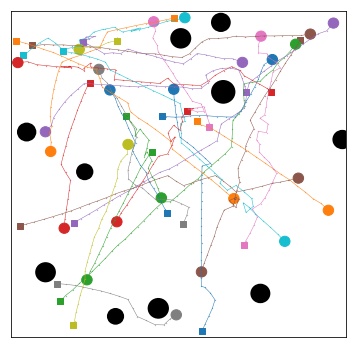

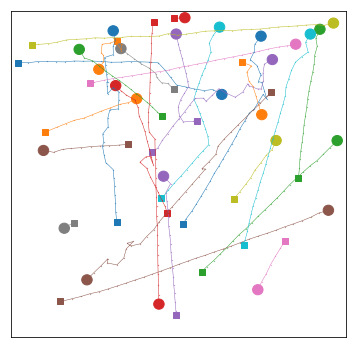

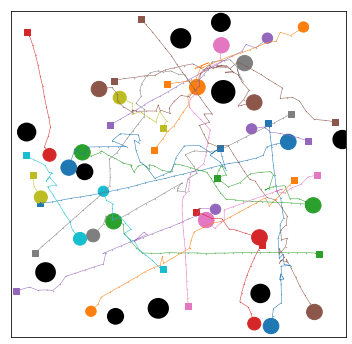

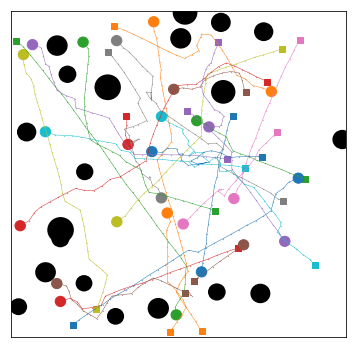

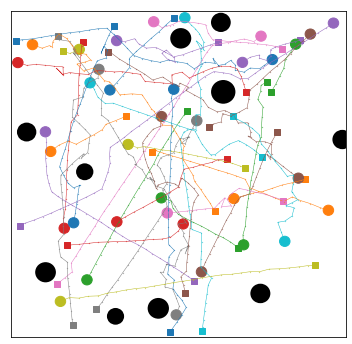

In [30]:
sampling_strategy = "ctrm_sampling"
datadir = os.path.join(DATADIR, sampling_strategy)

for dirname in tqdm(glob(os.path.join(datadir, "202*"))):
    eval_file = os.path.join(dirname, "eval.pkl")
    config_file = os.path.join(dirname, ".hydra", "config.yaml")
    with open(config_file, "r") as f:
        config = yaml.safe_load(f)
    with open(eval_file, "rb") as f:
        data = pickle.load(f)
        
    if config["roadmap"]["N_traj"] != 100:
        continue

    # read setting
    benchmark = config["insdir"].split("/")[-1]
    for i, (ins, res, info) in enumerate(data):
        if res.solved is False:
            continue
        plot_2d_for_paper(ins, res, output_size=6)
        savefig(f"fig/instance_solution_{benchmark}.pdf")
        break